In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from matplotlib import animation
from IPython.display import HTML

# Enable interactive widgets in Jupyter Notebook
%matplotlib widget

# Define the positions of the original lattice
x = np.linspace(0,6,7)
y = np.linspace(-3,3,7)
x_origine,y_origine = np.meshgrid(x,y)  # Create a 2D grid of x, y values


# Theoretical Reference Guide: Solid State Physics

## Introduction
In the provided script, we explore the physics of waves in a crystalline lattice which is a common model in solid state physics to describe the behavior of electrons in a material. The script visualizes two types of waves: longitudinal and transverse waves, as they propagate through a one-dimensional lattice.

## Key Concepts

### Wave Vector (k)
The wave vector $\ k \$ represents the direction and wavelength of a wave. It is defined as $\ k = \frac{2\pi}{\lambda} \$, where $\ \lambda \$ is the wavelength of the wave. The script allows interactive visualization of wave propagation for different values of $( k \$.

### Angular Frequency (ω)
The angular frequency $\ \omega \$ describes the speed of wave oscillation and is defined as $\ \omega = 2\pi f \$, where $\ f \$ is the frequency of the wave. In the script, $\ \omega \$ is set to 3.

### Lattice Displacement
The displacement of lattice points from their equilibrium positions is shown in the script. For longitudinal waves, the displacement is along the direction of wave propagation, while for transverse waves, it is perpendicular to the direction of wave propagation.

#### Longitudinal Displacement
$\ x_p = x + \sin(kx - \omega t)\ $

#### Transverse Displacement
$\ y_p = y + \sin(kx - \omega t) \$

### Meshgrid
The `np.meshgrid` function is used to create a 2D grid of x, y values which represents the lattice. This is essential for visualizing the displacement of lattice points as waves propagate through it.

## Figures
Two figures are generated to visualize the behavior of longitudinal and transverse waves. The figures are interactive and update based on the value of the wave vector $\ k \$ chosen by the user.

### Longitudinal Wave
The figure titled "Longitudinal" shows the displacement of lattice points along the direction of wave propagation as a function of time.

### Transverse Wave
The figure titled "Transverse" shows the displacement of lattice points perpendicular to the direction of wave propagation as a function of time.

## Animation
The `matplotlib.animation` module is used to create animations of the lattice as waves propagate through it. This visual representation aids in understanding how the position of lattice points changes over time due to the wave.

## Conclusion
Understanding the propagation of waves through a lattice is fundamental in solid state physics. It helps in understanding various phenomena like phonons, electron behavior, and other quantum mechanical effects in a solid.


interactive(children=(FloatSlider(value=0.0, description='k', max=1.0, min=-1.0, step=0.01), Output()), _dom_c…

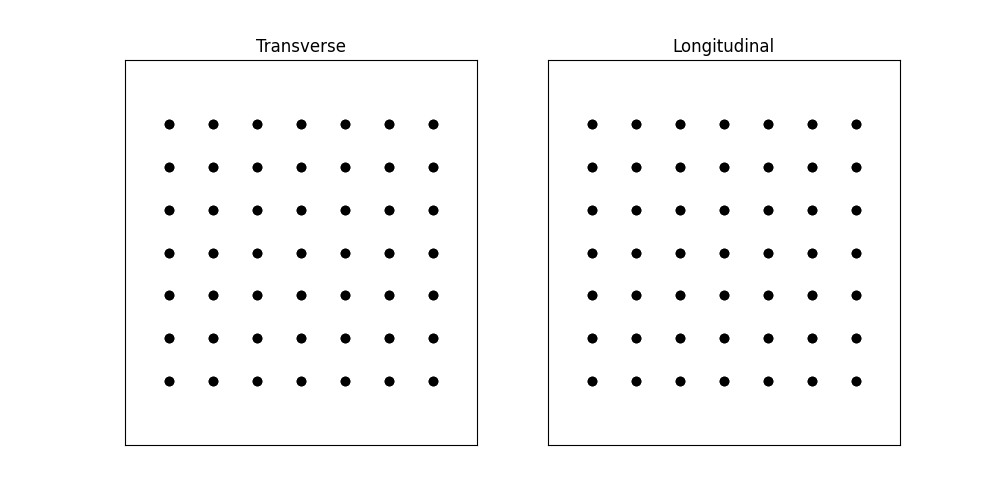

In [10]:
def interactive_wave_plot(k):
    '''
    :param k: wave number
    '''
    global current_k  # Declare current_k as a global variable so it can be accessed outside this function
    current_k= k  # Set the current wave number to the input value k
    
    # Define the position of the displaced lattice for longitudinal wave
    x_p = x + np.sin(k*x)  # Displace x positions based on a sine function of k and x
    x_long,y_long = np.meshgrid(x_p,y)  # Create a 2D grid of x, y values for the displaced lattice
    
    x_p = x + np.sin(k*x)  # Displace x positions again (this line seems redundant and can possibly be removed)
    y_p = y + np.sin(k*(x-np.mean(x)))  # Displace y positions based on a sine function of k and (x - mean(x))
    
    x_trans=x_origine  # x positions for transverse wave remains the same as the original lattice
    y_trans = y_origine+np.sin(k*x)  # Displace y positions based on a sine function of k and x for transverse wave

    fig1.clear()  # Clear previous plot on fig1
    fig1.set_xticks([])  # Remove x-axis ticks on fig1
    fig1.set_yticks([])  # Remove y-axis ticks on fig1
    fig1.axis([-1,7,-4.5,4.5])  # Set axis limits on fig1
    fig1.set_title('Transverse')  # Set title on fig1 as 'Transverse'
    fig1.plot(x_origine,y_origine,'ko', mfc='none')  # Plot original lattice positions on fig1
    fig1.plot(x_trans,y_trans,'ko')  # Plot displaced lattice positions for transverse wave on fig1
    
    fig2.clear()  # Clear previous plot on fig2
    fig2.set_title('Longitudinal')  # Set title on fig2 as 'Longitudinal'
    fig2.set_xticks([])  # Remove x-axis ticks on fig2
    fig2.set_yticks([])  # Remove y-axis ticks on fig2
    fig2.axis([-1,7,-4.5,4.5])  # Set axis limits on fig2
    fig2.plot(x_origine,y_origine,'ko', mfc='none')  # Plot original lattice positions on fig2
    fig2.plot(x_long,y_long,'ko')  # Plot displaced lattice positions for longitudinal wave on fig2

fig, (fig1, fig2) = plt.subplots(1,2, figsize=(10,5))  # Initialize a figure with two subplots (fig1 and fig2) side by side
plt.ion()  # Turn on interactive mode for plotting
interactive(interactive_wave_plot,k=(-1,1,0.01))  # Create an interactive plot using the function interactive_wave_plot with wave number k ranging from -1 to 1 with a step of 0.01


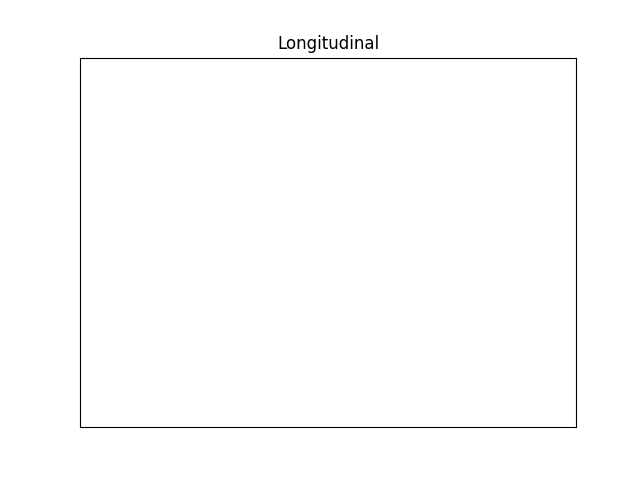

In [11]:
# Create a new figure for the longitudinal wave animation
fig_long = plt.figure()
ax = plt.axes()  # Create axes for the figure
ax.set_xlim((-1.5,7.5))  # Set x-axis limits
ax.set_ylim((-5,5))  # Set y-axis limits
line_or, = ax.plot([], [], 'ko', mfc=None)  # Initialize an empty plot for the original lattice positions
line_mov, = ax.plot([], [], 'ko')  # Initialize an empty plot for the moving lattice positions
plt.title("Longitudinal")  # Set the title of the plot to "Longitudinal"
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks

# Initialization function: plot the background of each frame
def init_long():
    line_or.set_data([], [])  # Clear the data of the original lattice plot
    line_mov.set_data([], [])  # Clear the data of the moving lattice plot
    return line_or,  # Return the original lattice plot line object

# Animation function which updates figure data. This is called sequentially
def animate_long(iteration):
    global current_k  # Access the global variable current_k
    k = current_k  # Assign the value of current_k to k
    omega = 3  # Define angular frequency
    t = omega * 2 * (1/100) / np.pi * iteration  # Calculate time based on the iteration number
    
    x = np.linspace(0, 6, 7)  # Define x positions
    y = np.linspace(-3, 3, 7)  # Define y positions
    
    x_origine, y_origine = np.meshgrid(x, y)  # Create a 2D grid of x, y values
    
    # Define the position of the displaced lattice for longitudinal wave
    x_p = x + np.sin(k * x - omega * t)  # Displace x positions based on a sine function
    x_long, y_long = np.meshgrid(x_p, y)  # Create a 2D grid of displaced x, y values
    
    x_trans = x_origine  # x positions for transverse wave remains the same as the original lattice
    y_trans = y_origine + np.sin(k * x - omega * t)  # Displace y positions based on a sine function for transverse wave
    line_mov.set_data(np.asarray([x_long, y_long]))  # Update the data of the moving lattice plot
    return line_mov,  # Return the moving lattice plot line object

# Check if anim_trans is already defined to avoid re-creating the animation unnecessarily
if 'anim_trans' in locals():
    anim_trans.event_source.stop()  # Stop any previous animations
anim_long = animation.FuncAnimation(fig_long, animate_long, init_func=init_long, frames=112, interval=25, blit=True)  # Create the animation for longitudinal wave


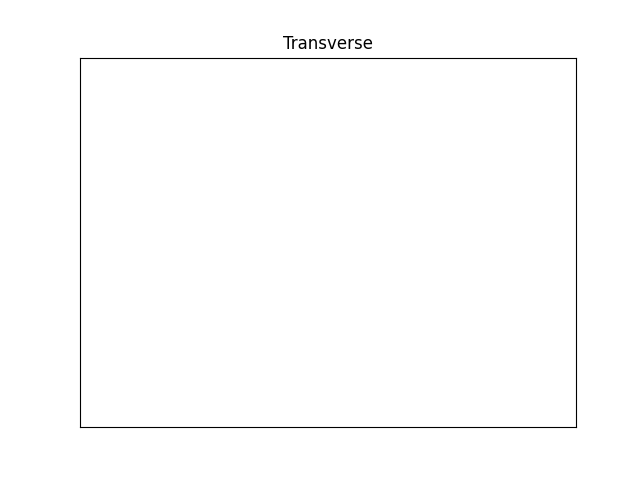

In [12]:
# Create a new figure for the transverse wave animation
fig_trans = plt.figure()
ax_trans = plt.axes()  # Create axes for the figure
ax_trans.set_xlim((-1.5,7.5))  # Set x-axis limits
ax_trans.set_ylim((-5,5))  # Set y-axis limits
line_or, = ax_trans.plot([], [], 'ko', mfc=None)  # Initialize an empty plot for the original lattice positions
line_mov, = ax_trans.plot([], [], 'ko')  # Initialize an empty plot for the moving lattice positions
plt.title("Transverse")  # Set the title of the plot to "Transverse"
ax_trans.set_xticks([])  # Remove x-axis ticks
ax_trans.set_yticks([])  # Remove y-axis ticks

# Initialization function: plot the background of each frame
def init():
    line_or.set_data([], [])  # Clear the data of the original lattice plot
    line_mov.set_data([], [])  # Clear the data of the moving lattice plot
    return line_or,  # Return the original lattice plot line object

# Animation function which updates figure data. This is called sequentially
def animate(iteration):
    global current_k  # Access the global variable current_k
    k = current_k  # Assign the value of current_k to k
    omega = 3  # Define angular frequency
    t = omega * 2 * (1/100) / np.pi * iteration  # Calculate time based on the iteration number
    
    x_origine, y_origine = np.meshgrid(np.linspace(0, 6, 7), np.linspace(-3, 3, 7))  # Create a 2D grid of x, y values
    
    x_trans = x_origine  # x positions for transverse wave remains the same as the original lattice
    y_trans = y_origine + np.sin(k * x - omega * t)  # Displace y positions based on a sine function for transverse wave
    
    line_mov.set_data(np.asarray([x_trans, y_trans]))  # Update the data of the moving lattice plot
    return line_mov,  # Return the moving lattice plot line object

# Check if anim_long is already defined to avoid re-creating the animation unnecessarily
if 'anim_long' in locals():
    anim_long.event_source.stop()  # Stop any previous animations
anim_trans = animation.FuncAnimation(fig_trans, animate, init_func=init, frames=112, interval=25, blit=True)  # Create the animation for transverse wave


# Self-Study Questions

1. **Wave Vector and Wavelength Relationship:**
    - What is the relationship between the wave vector $\ k \$ and the wavelength $\ \lambda \$?
    - How does changing the wave vector $( k \$ affect the wavelength and frequency of the wave?

2. **Longitudinal and Transverse Waves:**
    - What are the distinguishing characteristics of longitudinal and transverse waves?
    - How are the displacements of lattice points different in longitudinal and transverse waves?
    
3. **Angular Frequency:**
    - What is the significance of angular frequency $\ \omega \$ in wave mechanics?
    - How does changing the angular frequency $( \omega \$ affect the wave propagation?

4. **Lattice Displacement:**
    - How is the lattice displacement calculated in the script for both longitudinal and transverse waves?
    - What is the physical significance of lattice displacement in solid state physics?

5. **Interactive Visualization:**
    - How does the interactive visualization help in understanding wave propagation through a lattice?
    - Experiment with different values of the wave vector $\ k \$ in the interactive visualization. What observations can you make regarding the behavior of waves in the lattice?

6. **Animation:**
    - How does the animation illustrate the propagation of waves through the lattice?
    - What insights can be gained from observing the animation regarding the behavior of longitudinal and transverse waves?

7. **Meshgrid:**
    - What is the purpose of using the `np.meshgrid` function in the script?
    - How does `np.meshgrid` aid in visualizing the displacement of lattice points?

8. **Extension:**
    - Explore the concept of phonons and relate it to the lattice vibrations illustrated in the script.
    - How might the script be extended or modified to include other key concepts in solid state physics, such as the effect of an external electric or magnetic field?

